In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import easyocr

C:\Users\Niyoshi soni\anaconda3\envs\env_easyocr\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Niyoshi soni\anaconda3\envs\env_easyocr\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Niyoshi soni\anaconda3\envs\env_easyocr\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Niyoshi soni\anaconda3\en

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = tf.keras.utils.normalize(x_train, axis=1)

In [5]:
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [6]:
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=224, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(units=30, activation=tf.nn.softmax))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
 # Training the model
    model.fit(x_train, y_train, epochs=1)

60000/60000 [==============================] - 3s 48us/sample - loss: 0.2591 - acc: 0.9233


In [9]:
loss, accuracy = model.evaluate(x_test, y_test)
print(loss)
print(accuracy)

10000/10000 [==============================] - 0s 24us/sample - loss: 0.1219 - acc: 0.9640
0.12187154704257847
0.964


In [10]:
model.save('digits.model')

In [11]:
IMAGE_PATH = ('C:\\Users\\Niyoshi soni\\Desktop\\final year project\\3 try 1.jpg')

The number is probably a: 3


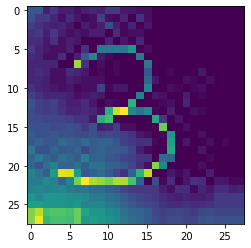

In [12]:
img = cv.imread(IMAGE_PATH)[:,:,0] 
img = np.invert(np.array([img]))
prediction = model.predict(img)
print(f'The number is probably a: {np.argmax(prediction)}')
plt.imshow(img[0])
plt.show()